In [3]:
%matplotlib

Using matplotlib backend: <object object at 0x000001B9B88C0690>


In [4]:
%matplotlib inline

In [5]:
pd.set_option('display.max_rows',    100)      # DataFrame 데이터 확인 시 최대 표시 행 수
pd.set_option('display.max_columns', 100)      # DataFrame 데이터 확인 시 최대 표시 열 수

## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

## 데이터 불러오기

In [6]:
Fold = 5

# k-fold 학습/검증 데이터
for i in range(Fold):
    
    path1 = './K_FoldData/Training_Fold%d'%(i+1)
    path2 = './K_FoldData/Validation_Fold%d'%(i+1)
    c1 = 'Training_Fold%d   = np.array(pd.read_csv(path1, sep=",", header=None))'%(i+1)
    c2 = 'Validation_Fold%d = np.array(pd.read_csv(path2, sep=",", header=None))'%(i+1)
    exec(c1)
    exec(c2)

# K-fold 학습/검증 레이블
TrainingFold_Label   = np.array(pd.read_csv('./K_FoldData/TrainingFold_Label_forANN'  , sep=",", header=None))
ValidationFold_Label = np.array(pd.read_csv('./K_FoldData/ValidationFold_Label_forANN', sep=",", header=None))
    
    
# 전체 학습용 데이터
Training_All       = np.array(pd.read_csv('./K_FoldData/Training_All', sep = ",", header = None))
Training_All_Label = np.array(pd.read_csv('./K_FoldData/Training_All_Label_forANN', sep = ",", header = None))

print(Training_Fold1.shape)
print(Validation_Fold1.shape)
print(TrainingFold_Label.shape)
print(ValidationFold_Label.shape)
print(Training_All.shape)

(288, 30)
(72, 30)
(288, 2)
(72, 2)
(360, 30)


## ANN(Artificial Neural Network) hyperparameter 설정

In [7]:
learningRate  = 0.0001
noOfNeuron    = 16
iteration     = 500

## Keras 기반 ANN 구조(Architecture) 설계

In [8]:
def ANN_model(input_data):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units = noOfNeuron,
                                 input_shape = (input_data.shape[1],), activation = 'relu'))    # Hidden Layer 1
    model.add(keras.layers.Dense(units = noOfNeuron,                   activation = 'relu'))    # Hidden Layer 2
    model.add(keras.layers.Dense(units = 2,                            activation = 'softmax')) # Output Layer
    
    
    
    model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                  loss=keras.losses.categorical_crossentropy,
                  metrics=['accuracy'])
    return model

## Keras 기반 ANN(Artificial Neural Network) 학습 및 평가 방법

In [9]:
tf.random.set_seed(777)

Data      = Training_Fold1
Data_Val  = Validation_Fold1
Label     = TrainingFold_Label
Label_Val = ValidationFold_Label

model = ANN_model(Data)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = model.fit(Data, Label, epochs=iteration, verbose = 0)
Loss, Accuracy = model.evaluate(Data_Val,  Label_Val, verbose=0)

print(Accuracy)

0.9583333134651184


## Keras 기반 ANN(Artificial Neural Network) 학습 및 검증

In [11]:
Label        = TrainingFold_Label
Label_Val    = ValidationFold_Label
Accuracy_sum = 0

print('[Reslut of K-fold Cross Validation] \n')

for i in range(Fold):
    tf.random.set_seed(777)
    
    s1= 'Data     = Training_Fold%d'  %(i+1)
    s2= 'Data_Val = Validation_Fold%d'%(i+1)
    exec(s1)
    exec(s2)
    
    model = ANN_model(Data)
    
# train my model
    hist = model.fit(Data, Label, epochs=iteration, verbose = 0)
    Loss, Accuracy = model.evaluate(Data_Val,  Label_Val, verbose=0)
    Accuracy_sum = Accuracy_sum + Accuracy
    print('Fold {}: {:.2f}%'.format((i+1), Accuracy*100))

print('* Average accuracy : {:.2f}%'.format((Accuracy_sum/Fold)*100))

[Reslut of K-fold Cross Validation] 

Fold 1: 95.83%
Fold 2: 97.22%
Fold 3: 90.28%
Fold 4: 97.22%
Fold 5: 100.00%
* Average accuracy : 96.11%


## 전체 학습 데이터로 ANN 학습 및 모델 저장

In [12]:
IterationForPrintAcc = 100

class AccuracyPerEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keras.callbacks.Callback()
        if epoch%IterationForPrintAcc == 0:
            print("{} Epochs Accuracy : {:.2f}% ".format(epoch, logs["accuracy"]*100))

In [13]:
tf.random.set_seed(777)    

Data  = Training_All
Label = Training_All_Label

model = ANN_model(Training_All)
hist = model.fit(Data, Label, epochs=iteration, verbose = 0, callbacks = [AccuracyPerEpoch()])

print('Final Train Accuracy : {:.2f}%'.format(hist.history['accuracy'][-1]*100))

0 Epochs Accuracy : 50.00% 
100 Epochs Accuracy : 43.61% 
200 Epochs Accuracy : 93.06% 
300 Epochs Accuracy : 96.67% 
400 Epochs Accuracy : 96.67% 
Final Train Accuracy : 96.11%


C:\Users\borus\AppData\Local\Temp\ipykernel_12932\1028235006.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', label='train loss', c = 'tab:red')
C:\Users\borus\AppData\Local\Temp\ipykernel_12932\1028235006.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc', c = 'tab:blue')


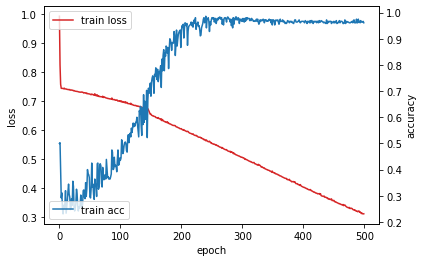

In [14]:
# 학습 과정 확인

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss', c = 'tab:red')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc', c = 'tab:blue')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [15]:
# 모델 저장
model.save("./MLmodels/ANN_model.h5")

## ANN model 불러와서 진단

In [16]:
# 모델 불러오기
ANN_model_Final = keras.models.load_model("./MLmodels/ANN_model.h5")

In [17]:
Add    = 0
Divide = 0

for i in range(Fold):
    c1 = 'Validation_CurrentFold = Validation_Fold%d'%(i+1)
    exec(c1)    
    
    c2 = 'Loss, annscore_Fold%d = ANN_model_Final.evaluate(Validation_CurrentFold, ValidationFold_Label, verbose=0)'%(i+1)
    exec(c2)
    
    Loss, Accuracy = ANN_model_Final.evaluate(Validation_CurrentFold, ValidationFold_Label, verbose=0)

    Add += Accuracy
    Divide += 1
    
Avg_accuracy = Add/Divide

print('[Performance of KNN model] \n')
print(' Fold 1: {:.2f}% \n Fold 2: {:.2f}% \n Fold 3: {:.2f}% \n Fold 4: {:.2f}% \n Fold 5: {:.2f}%'.
        format(annscore_Fold1*100, annscore_Fold2*100, annscore_Fold3*100, annscore_Fold4*100, annscore_Fold5*100))
print('\n Average accuracy: {:.2f}%'.format(Avg_accuracy*100))

[Performance of KNN model] 

 Fold 1: 97.22% 
 Fold 2: 97.22% 
 Fold 3: 91.67% 
 Fold 4: 95.83% 
 Fold 5: 100.00%

 Average accuracy: 96.39%
